In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.data.load_data import DataLoader


In [6]:

# Set style
plt.style.use('ggplot')
sns.set_palette("viridis")

In [7]:
# Load data
loader = DataLoader('../data/raw/train_less.csv')
data = loader.load_data()


Data Loaded Sucessfully. Shape:(10000, 11)


In [8]:
# 1. Basic Information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   RhythmScore                10000 non-null  float64
 2   AudioLoudness              10000 non-null  float64
 3   VocalContent               10000 non-null  float64
 4   AcousticQuality            10000 non-null  float64
 5   InstrumentalScore          10000 non-null  float64
 6   LivePerformanceLikelihood  10000 non-null  float64
 7   MoodScore                  10000 non-null  float64
 8   TrackDurationMs            10000 non-null  float64
 9   Energy                     10000 non-null  float64
 10  BeatsPerMinute             10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB
None

First 5 rows:
   id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0    

In [9]:
# 2. Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                id   RhythmScore  AudioLoudness  VocalContent  \
count  10000.00000  10000.000000   10000.000000  10000.000000   
mean    4999.50000      0.631658      -8.363825      0.074259   
std     2886.89568      0.156555       4.609184      0.050053   
min        0.00000      0.259570     -27.030618      0.023500   
25%     2499.75000      0.512842     -11.497048      0.023500   
50%     4999.50000      0.634167      -8.326337      0.065282   
75%     7499.25000      0.738942      -4.874867      0.107762   
max     9999.00000      0.975000      -1.357000      0.246748   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count     10000.000000       10000.000000               10000.000000   
mean          0.265391           0.119566                   0.177991   
std           0.225847           0.134153                   0.118728   
min           0.000005           0.000001                   0.024300   
25%           0.069236          

In [10]:

# 3. Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64


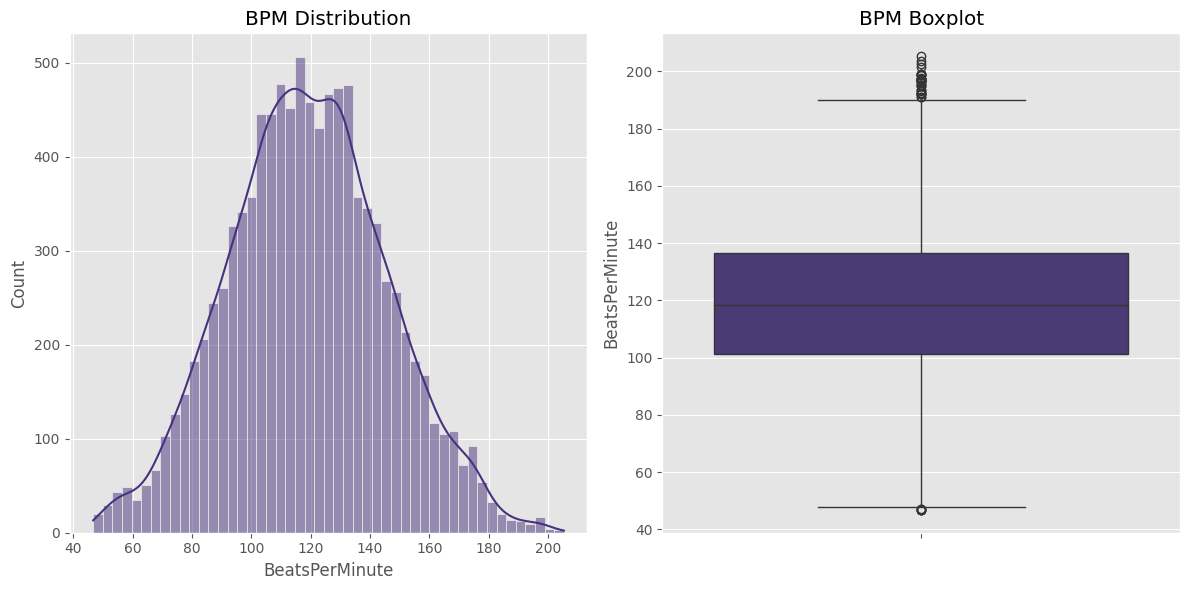

In [12]:
# 4. Target variable distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['BeatsPerMinute'], kde=True)
plt.title('BPM Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['BeatsPerMinute'])
plt.title('BPM Boxplot')
plt.tight_layout()
plt.savefig('../reports/figures/bpm_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


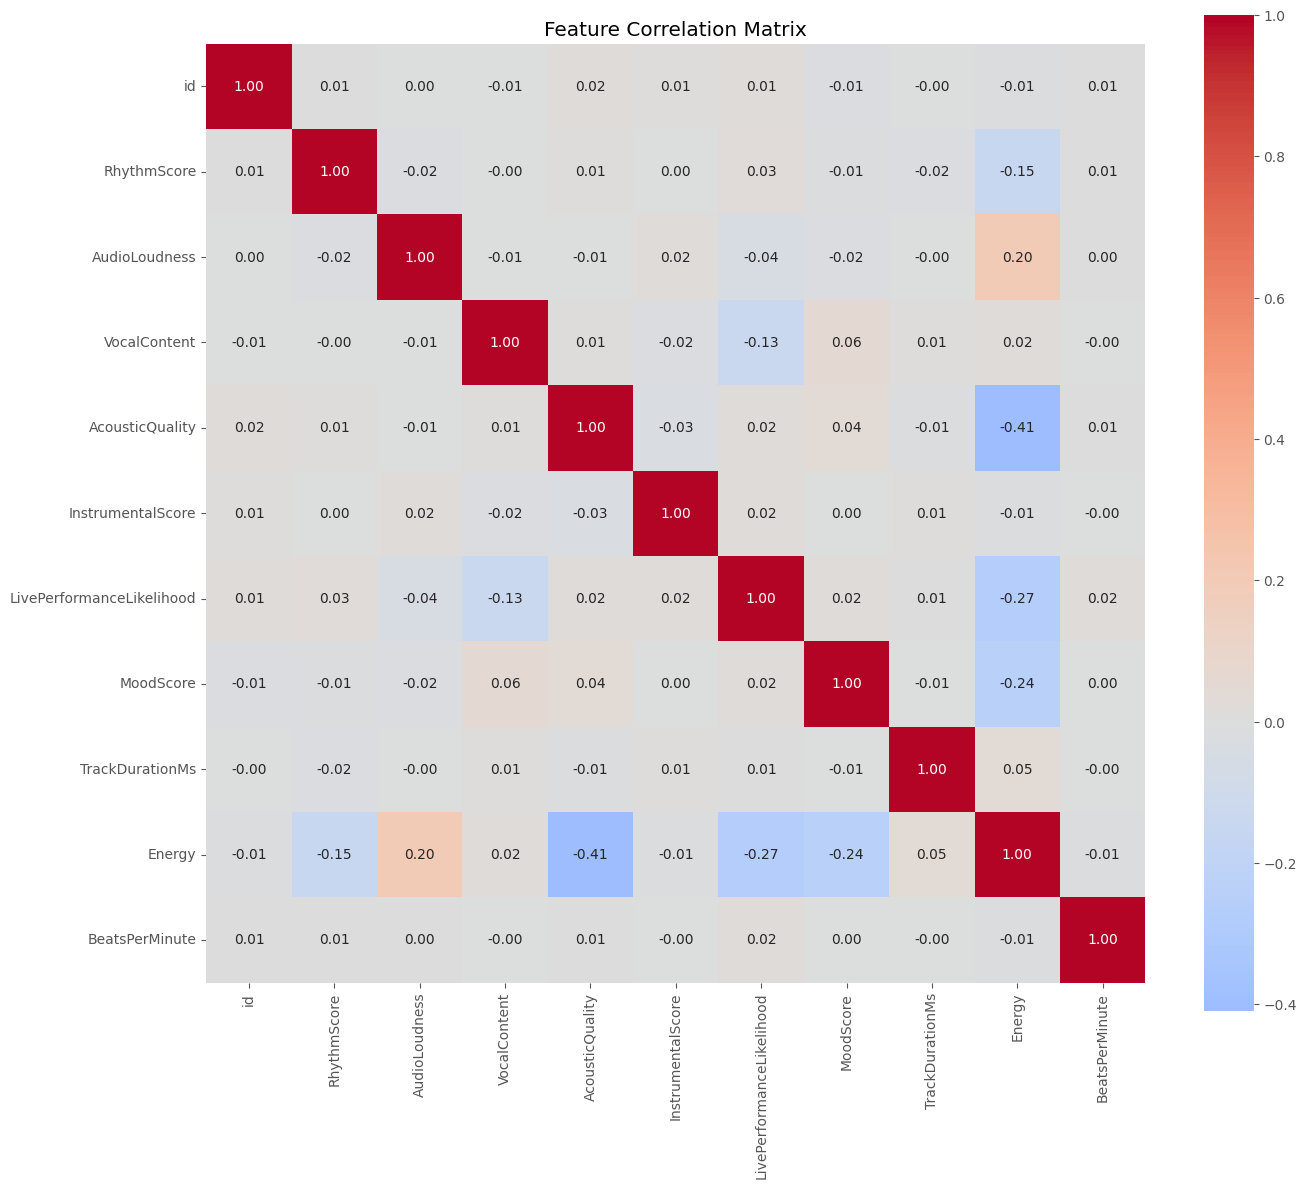

In [13]:
# 5. Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


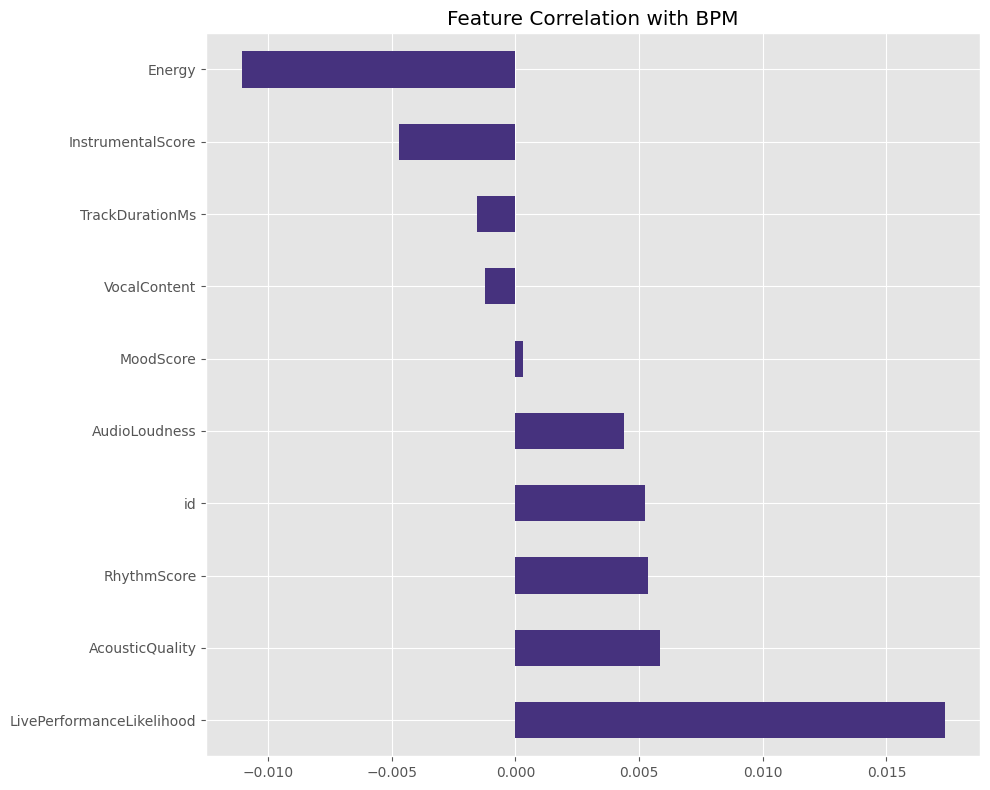

In [14]:
# 6. Correlation with target
target_corr = correlation_matrix['BeatsPerMinute'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
target_corr.drop('BeatsPerMinute').plot(kind='barh')
plt.title('Feature Correlation with BPM')
plt.tight_layout()
plt.savefig('../reports/figures/target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


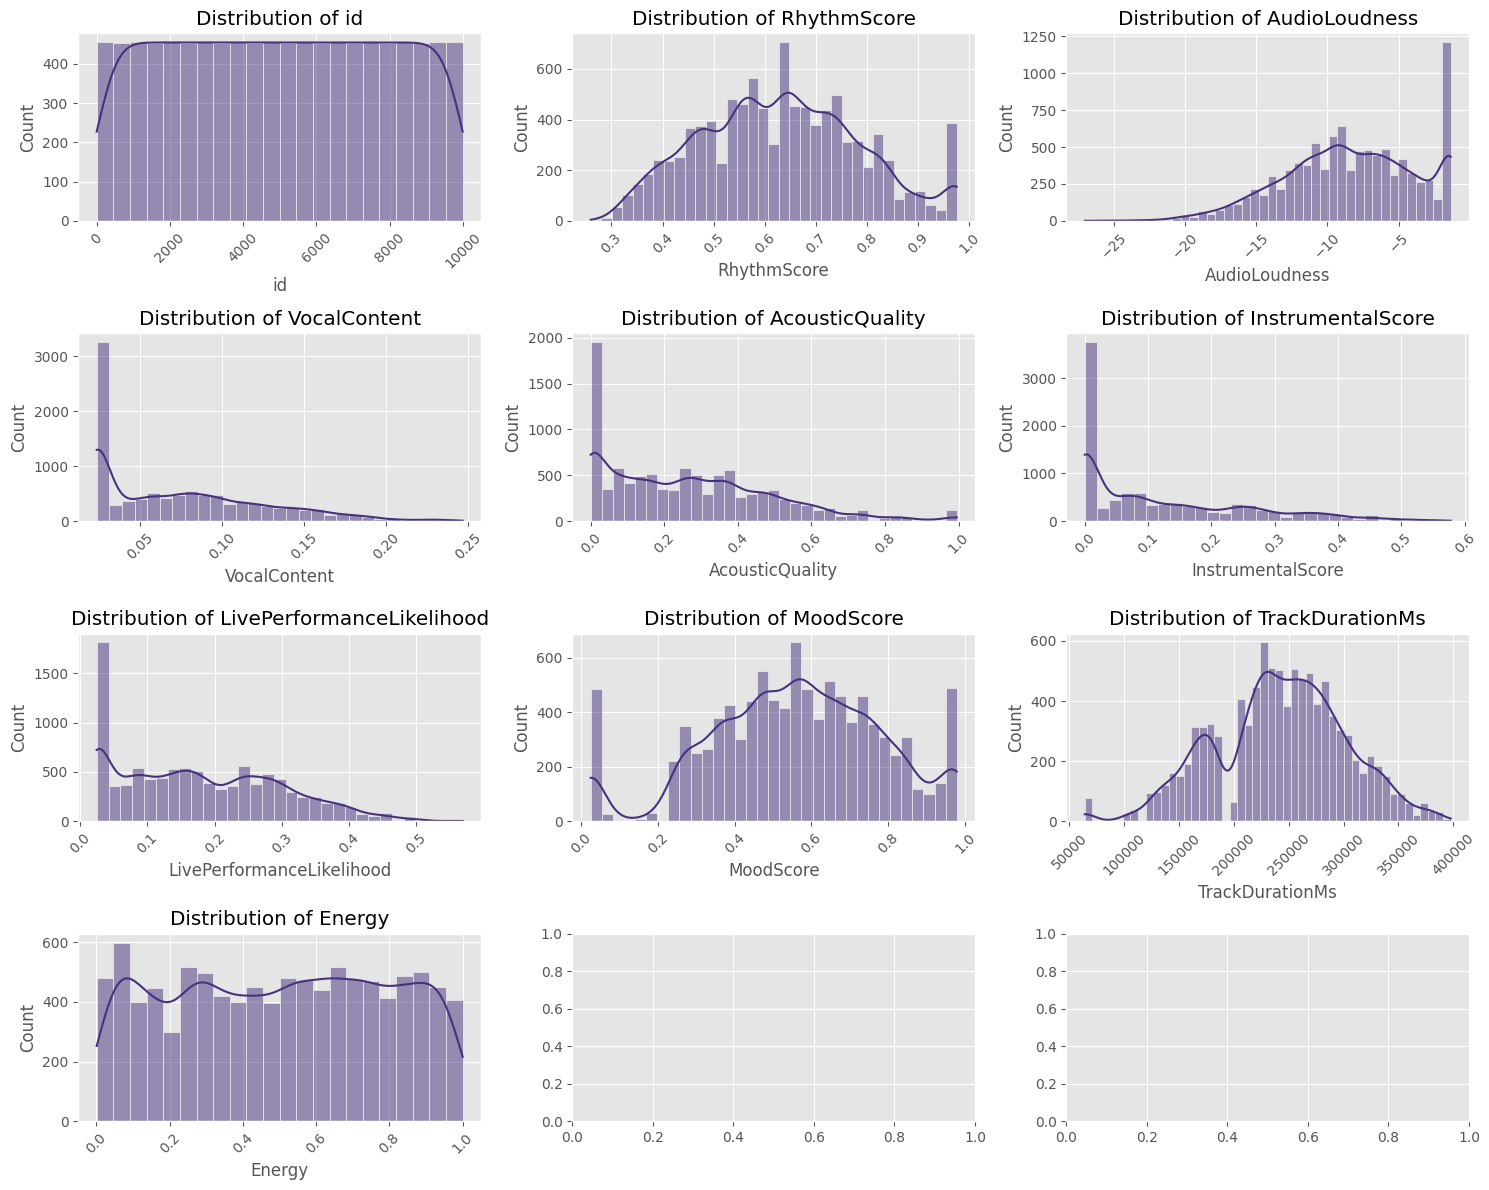

In [15]:
# 7. Feature distributions
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('BeatsPerMinute')

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features[:12]):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# 8. Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

print("\nOutlier Summary:")
print(outliers)



Outlier Summary:
id                             0
RhythmScore                    0
AudioLoudness                 29
VocalContent                  22
AcousticQuality              134
InstrumentalScore             52
LivePerformanceLikelihood      6
MoodScore                      0
TrackDurationMs               83
Energy                         0
BeatsPerMinute                45
dtype: int64


In [17]:
# 9. Interactive correlation plot (Plotly)
fig = px.imshow(correlation_matrix, 
                title='Interactive Correlation Matrix',
                width=800, height=800)
fig.show()

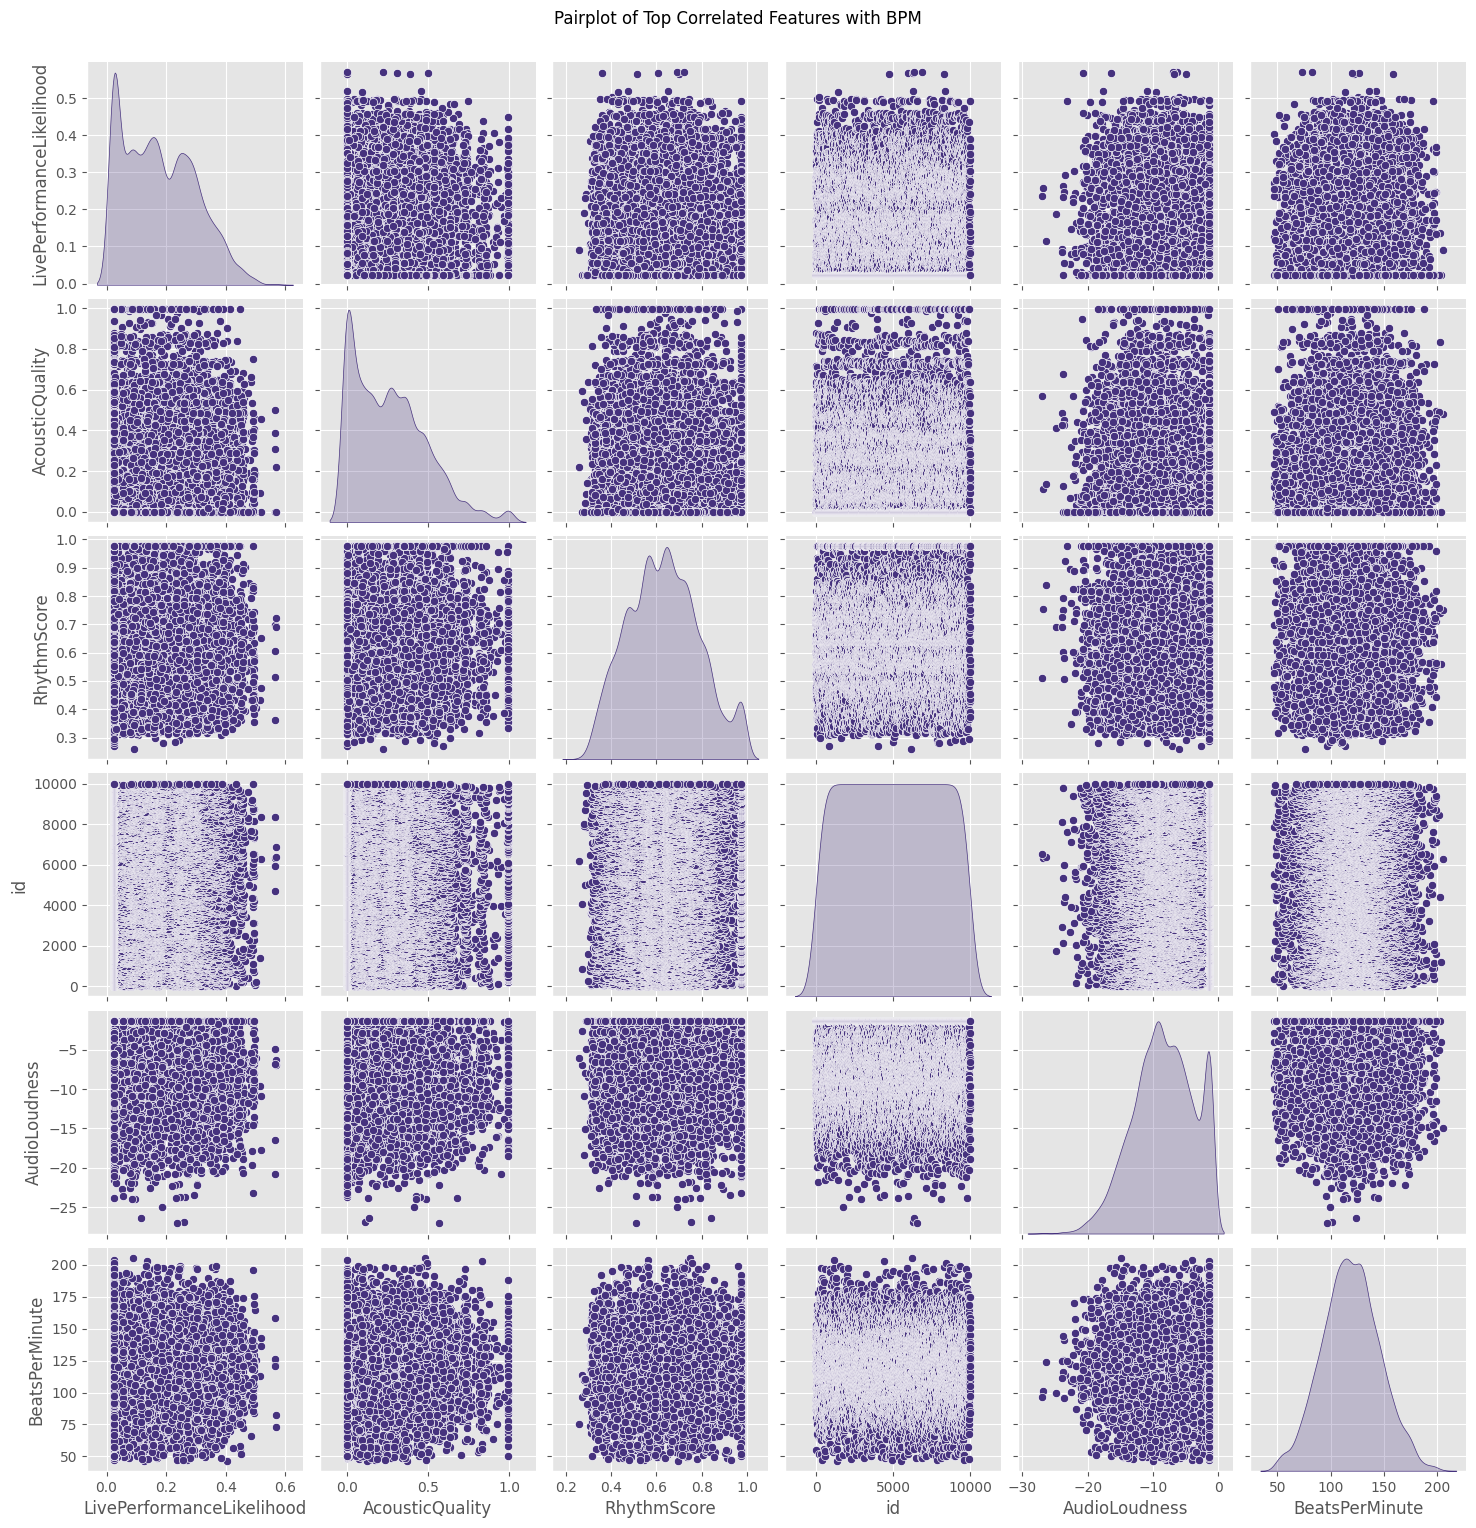

In [18]:

# 10. Pairplot of top correlated features with target
top_features = target_corr.index[1:6].tolist()  # Top 5 features excluding target
sns.pairplot(data[top_features + ['BeatsPerMinute']], diag_kind='kde')
plt.suptitle('Pairplot of Top Correlated Features with BPM', y=1.02)
plt.savefig('../reports/figures/pairplot_top_features.png', dpi=300, bbox_inches='tight')
plt.show()